# Introduction

Tout d'abord, c'est quoi VBA? après un googlage rapide, voici une description très sommaire;

>Visual Basic for Applications (VBA) est une implémentation de Microsoft Visual Basic qui est intégrée dans toutes les applications de Microsoft Office...  
—[Wikipédia](https://fr.wikipedia.org/wiki/Visual_Basic_for_Applications)

En effet, VBA peut être utilisé dans à peu près toutes les application Microsoft Office. Ce qui nous intéresse dans ce cours est plus particulierement Excel. Voici seulement trois exemples ce qu'on peut donc faire avec VBA;
* Automatiser les actions répetitives : avec quelques lignes de codes, on peut effectuer un nomre inportant de commande
* D'interagir sur les classeur Excel: on peut contrôler tout le contenu avec du code
* Créer des formulaires personnalisés: Afin de faciliter l'utilisation

La programmation en Visual Basic for Applications (VBA) est liée à la manipulation des objets qui composent Excel® et d'autres applications Office. Dans ce chapitre, nous présentons le modèle d'objet Excel et certains objets Excel couramment utilisés.

# La programmation orientée objet (POO)
La programmation orientée objet (POO) est un style de programmation basé sur l'utilisation d'objets et de leurs interactions. Un objet est une structure de données qui contient des propriétés et des méthodes. Les propriétés d'un objet sont utilisées pour stocker des données. Les méthodes d'un objet sont utilisées pour accéder et modifier les données stockées dans les propriétés. Un objet peut contenir d'autres objets et interagir avec eux.

Les object sont classés par hiérarchie, nous utilisons l'opérateur `.` pour accéder à un objet dans la hiérarchie des objets. Pour faire référence à un objet unique d'une collection, nous utilisons le nom de l'objet ou son numéro d'index. Dans la sous-procédure suivante, par exemple, nous attribuons d'abord le texte "A String" à la deuxième cellule de la première ligne de la première feuille. Ensuite, nous utilisons la fonction VBA `Debug.Print` pour afficher la valeur de cette cellule et le nom du classeur actuel dans la fenêtre `Immediate`.

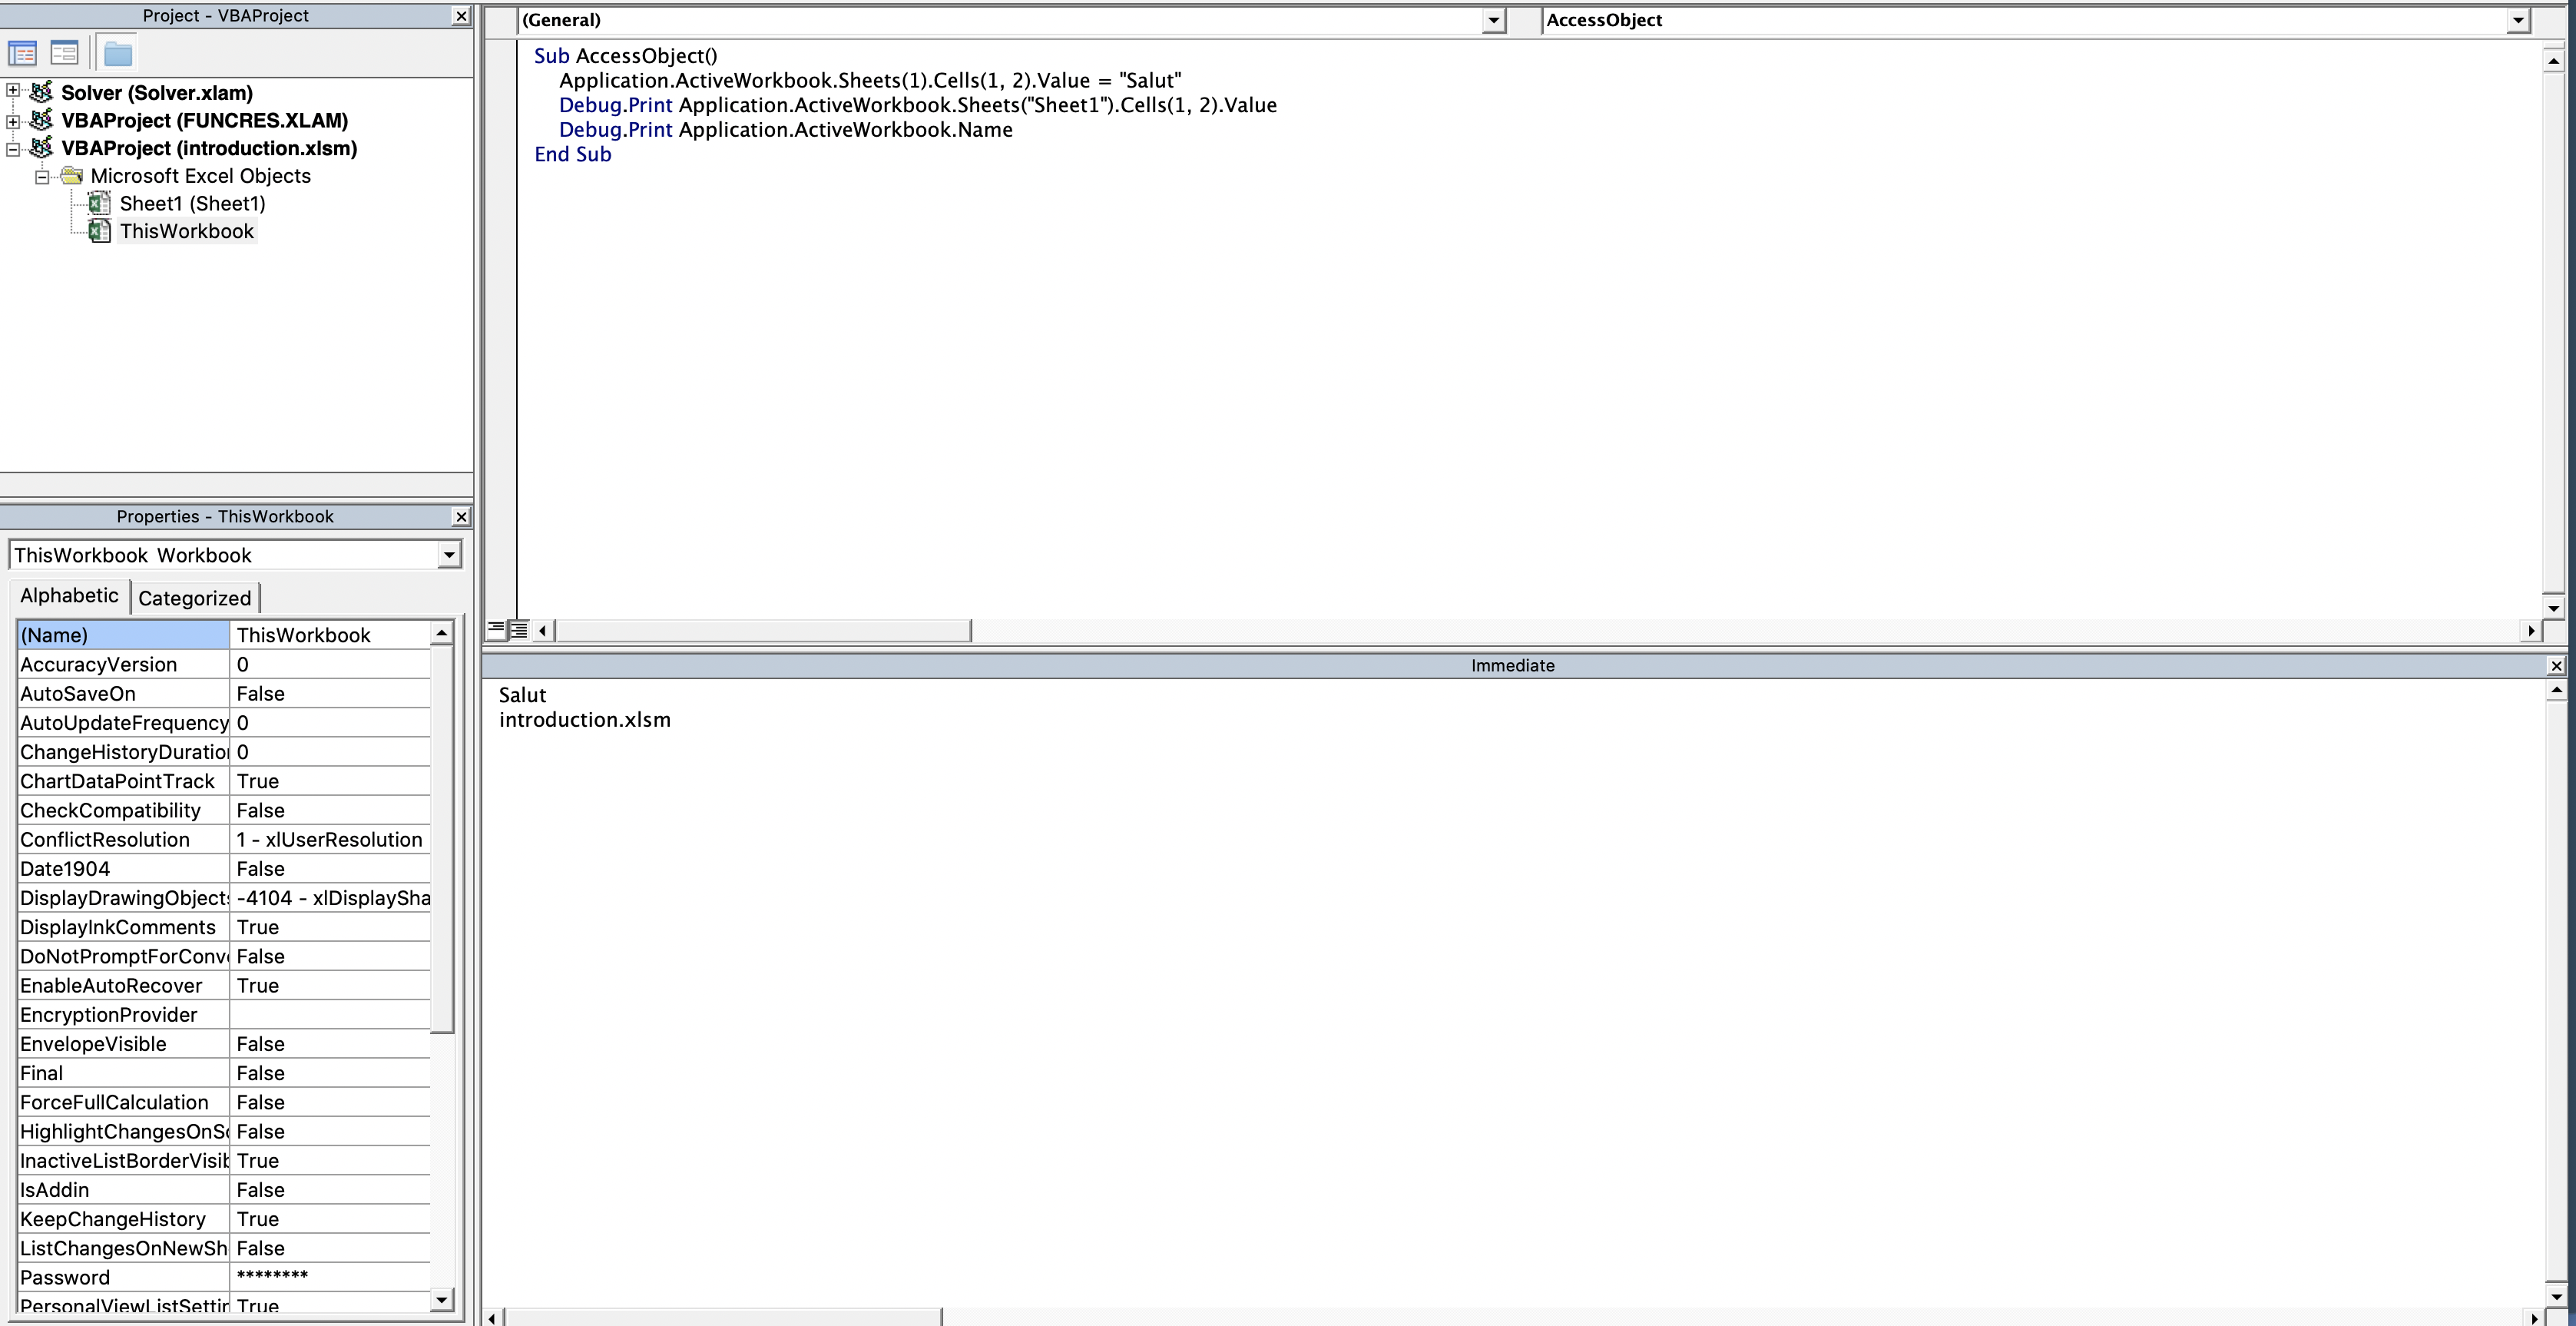

Dans cette même fenêtre (Immediate), on peut écrire ou un morceau de code précédé par `?` et avoir le résultat sans avoir à insérer le tout dans une procédure (nous y reviendrons plutard)

```
? 1 + 1
2
```

ou avoir par exemle le nom de l'application 

```
?Application.Name
Microsoft Excel
```

Comme on peut le remarquer le code VBA peut des fois sembler un peu long à écrire. Toutefois, Nous pouvons simplifier la référence à un objet dans la hiérarchie des objets en omettant les références aux objets supposés. Si un objet est l'objet actuellement actif, nous pouvons omettre la référence à l'objet.

Cela comporte uncertain risque, car il faut assumer que nous faison référence à la feuille active ou le classeur actif, une hypothèse que l'utilisateur pourrait ignorer.

```
Sheets(1).Cells(1, 2).Value = "Hello world"
```

Comme nous l'avons déjà mentionné, un objet contient des propriétés et des méthodes. Une méthode peut modifier les propriétés d'un objet ou lui faire faire quelque chose. Par exemple le code suivant montre comment utiliser la fonction VBA Copy pour copier le contenu d'une cellule dans une autre cellule.

```vbnet
Sub CopierValeur()
    ThisWorkbook.Worksheets(1).Activate
    Cells(2, 2).ClearContents
    Debug.Print Cells(1, 1).Value
    Debug.Print Cells(2, 2).Value
    Cells(1, 1).Copy Cells(2, 2)
    Debug.Print Cells(2, 2).Value
End Sub
```

Dans le code ci-dessus, nous commençons par activer la première feuille de calcul en appelant la méthode `Activate`. Ensuite, nous appelons la méthode `ClearContents` pour effacer le contenu de la cellule de la deuxième ligne et de la deuxième colonne. Aux lignes 4-5, nous appelons la fonction VBA `Debug.Print` pour afficher le contenu des deux cellules dans la fenêtre immédiate. Aux lignes 6-7, nous copions le contenu de la première cellule dans la deuxième cellule et affichons à nouveau le contenu de la deuxième cellule. Si nous exécutons le code ci-dessus, nous voyons la sortie suivante dans la fenêtre Immédiate :

```
CopierCellule

CopierCellule
```


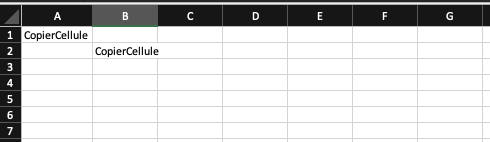

## L'objet application

l'objet Application est l'objet le plus haut placé dans le modèle POO Excel. L'objet Application contient des paramètres et des options applicables à l'ensemble de l'application ainsi que des objets et des méthodes de premier niveau. Cet objet contient de nombreuses propriétés et méthodes. Voici [une liste des propriétés](https://docs.microsoft.com/en-us/office/vba/api/excel.application(object)) les plus utilisées.

## L'objet Workbook

Un objet Workbook représente un classeur Microsoft Excel. Un objet Workbook est un membre de la collection Workbook, qui contient tous les objets Workbook actuellement ouverts dans Microsoft Excel.

En plus de la propriété Workbooks, l'objet Application possède d'autres propriétés liées aux classeurs : ThisWorkbook et ActiveWorkbook. Nous pouvons obtenir un objet Workbook à partir de la collection Workbooks. Nous pouvons également obtenir un objet Workbook à partir des propriétés ThisWorkbook et ActiveWorkbook. 

La sous-procédure suivante montre comment faire référence à un classeur en utilisant trois approches :

```
Sub workbookDemo1()
    Debug.Print Application.ThisWorkbook.FullName
    Debug.Print Application.ActiveWorkbook.FullName
    Debug.Print Application.Workbooks(1).FullName
End Sub
```

Les méthodes les plus communes utilisées par cet objet sont:
* Activate
* Close
* Save
* SaveAs

Par exemple, l'exécution de la sous-procédure suivante permet d'enregistrer les modifications puis de fermer le classeur en cours :

```
Sub WorkbookDemo3() 
    ThisWorkbook.Save 
    ThisWorkbook.Close
End Sub
```

Notez qu'un objet Workbook ne dispose pas de la méthode `Open`.

## L'objet Worksheet

Un objet Worksheet représente une feuille de travail et est membre de la collection Worksheet et de la collection Sheets. La collection Worksheets contient tous les objets Worksheet d'un classeur. La collection Sheets contient toutes les feuilles d'un classeur, y compris les graphiques et les feuilles de travail. La collection Graphiques contient tous les graphiques d'un classeur. 

La sous procédure suivante montre comment se référer aux propriétés d'un objet Feuille de calcul :

```

Sub WorksheetDemo()
    Debug.Print ActiveSheet.Index
    Debug.Print ActiveSheet.Name
    Debug.Print ActiveSheet.UsedRange.Address
    ActiveSheet.Name = "ChangeDeNom"
    Debug.Print ActiveSheet.Name
End Sub
```

En exécutant ce code, nous obtenons la sortie suivant:
```
 1 
ChangeDeNom
$A$1:$B$2
ChangeDeNom
```

## L'objet Range


Un objet Range est une collection de cellules et représente une plage contenue dans un objet Worksheet. Comme les autres objets, un objet Range possède des propriétés et des méthodes. Un objet Range peut contenir une seule cellule ou toutes les cellules d'une feuille de calcul.

Nous pouvons faire référence à un objet Range de différentes manières. Ci-dessous donne une liste d'expressions qui peuvent être utilisées pour faire référence à un objet Range. Dans ce tableau, nous présentons uniquement l'expression permettant de faire référence à un objet Range dans l'objet ActiveWorksheet. Pour faire référence à un objet Range dans une feuille de calcul différente de la feuille de calcul active, nous pouvons inclure l'objet parent dans la référence.

* Range("A3:C4") : Cellules des colonnes A à C et des lignes 3 à 4
* Range("A1") : La cellule de la colonne A et de la ligne 1
* Range("RName"): La plage de cellules nommée "RName"
* Range("1:1"): Cellules de la rangée 1
* Range("A:A") : Cellules de la colonne A
* Cells(1,1): Équivalent de Range("A1") 
* Range(Cells(3,1), Cells(4,3)): Équivalent de Range("A3:C4")  
* Range("A1").Offset(2,3): La cellule deux rangées en dessous de A1 et trois colonnes à droite de A1


Par exemple, le code suivant donne le nombre de cellues dans la plage `A9:C24`
```
Sub Compte()
    Debug.Print Workbooks("introduction.xlsm").Worksheets("Sheet2").Range("A9:C24").Cells.Count
End Sub
```

L'objet Offset fournit un autre moyen utile de faire référence à un objet Range par rapport à un autre objet Range. Comme l'objet Cells, l'objet Offset prend également deux arguments, qui représentent respectivement le nombre de lignes et le nombre de colonnes à décaler. Par exemple, nous pouvons faire référence à la cellule "B2" comme suit :

```
Sub ReferCell2()
    Debug.Print Range("A1").Offset(1, 1).Address
    Debug.Print Range("E4").Offset(-2, -3).Address
End Sub
```
Ce code nous retourne le résultat suivant:

```
$B$2
$B$2
```

Un objet Range possède de nombreuses propriétés. La liste ci-dessous présente une liste des propriétés les plus courantes d'un objet Range. Certaines de ces propriétés sont en lecture seule. Pour les propriétés en lecture seule, le code VBA peut consulter leurs valeurs mais ne peut pas les modifier. Text et Count sont des exemples de propriétés en lecture seule. Si une propriété n'est pas en lecture seule, vous pouvez obtenir et définir la valeur de cette propriété.

| Propriété | Read-Only |
| :--- | :--- | 
| Value | No | 
| Text | Yes | 
| Count | Yes |
| Column | Yes |
| Row | Yes | 
| Address | Yes |
| Font | No | 
| Interior | No |
| Formula | No | 
| NumberFormat | No | 

Le code ci-dessous montre comment définir la valeur d'une cellule, modifier le format et afficher la chaîne de caractères comme indiqué dans la feuille de calcul :

```
Sub ElectionFed2021()
    Range("A1").Value = 612000000
    Range("A1").NumberFormat = "$#,##0_);($#,##0)"
    Debug.Print Range("A1").Value
    Debug.Print Range("A1").Text
End Sub
```

L'exécution du code ci-dessus donne le résultat suivant :
```
 612000000 
$612,000,000 
```

Pour une liste complète des propriétés et méthodes d'un objet Range, le lecteur est invité à consulter la documentation [MSDN (Microsoft Developer Network)](https://docs.microsoft.com/en-us/office/vba/api/Excel.Range(object)).


## L'objet WorksheetFunction

L'objet WorksheetFunction est un conteneur pour les fonctions de feuille de calcul Excel qui peuvent être appelées à partir du code VBA. 
Vous êtes familiarisé avec l'utilisation des fonctions de feuille de calcul dans une formule de cellule. Dans cette section, nous présentons comment appeler les fonctions de feuille de calcul dans le code VBA. Voici quelques exemples de fonctions:

* Count
* CountIf
* RandBetween
* ...etc

La sous procédure ci-dessous génère un nombre aléatoire et le place dans la cellus A1.

```
Sub exemplFonctions()
    Range("A1").Value=WorksheetFunction.RandBetween(0,100)/100
end sub
```

# Déclaration des variables

Une variable est un emplacement de stockage nommé dans la mémoire d'un ordinateur. Les variables nous permettent de stocker des valeurs et d'y revenir ultérieurement. Dans cette section, nous présentons la manière de déclarer des variables et certains types de données courants. 

On appelle déclaration le fait de définir la variable avant de l’utiliser, dimensionnement : le fait de lui donner un type.
En Visual Basic, la déclaration des variables n’est pas obligatoire tant que l’option Explicit n’est pas activée. Le dimensionnement n’est jamais obligatoire puisque les variables ont toujours à minima le type universel par défaut.
La déclaration des variables en Visual Basic est de la forme suivante :

`Instruction de déclaration` – `Nom de la variable` – `As` – `Type de la variable`

Par exemple:
```
Dim Age As Integer
```

Déclare la variable Age comme étant un entier 16 bits.

On peut utiliser une seule instruction de déclaration pour déclarer plusieurs variables en les séparant par des virgules. Par exemple la ligne suivante déclare et dimensionne deux variables Nom et Prenom comme étant deux chaînes de caractères :

```
Dim Nom As String, Prenom As String
```

Contrairement à de nombreux autres langages, le type ne se propage pas sur une ligne de déclaration. Ainsi la déclaration :

```
Dim Nom, Prenom As String
```

N’est pas équivalente à la déclaration précédente puisqu’elle se lit :

```
Dim Nom As Variant, Prenom As String
```

Les noms de variable doivent commencer par un caractère alphabétique, être uniques au sein d'une même portée, ne doivent pas excéder 255 caractères et ne peuvent contenir ni caractère de déclaration de type ni point.

Le tableau ci-dessous présente une liste des types de données intégrés à VBA. En ce qui concerne le choix d'un type de données pour une variable, vous devez en général choisir un type de données qui peut contenir toutes les données que vous voulez stocker et qui utilise le plus petit nombre d'octets. La plupart des types de données présentés dans ce tableau sont faciles à comprendre, à l'exception d'`Object` et de `Variant`.


| Data Type | Bytes Used | Range of Values |
| :--- | :--- | :--- |
| Boolean | 2 | True or False |
| Byte | 1 | 0 to 2^(8)-1 |
| Integer | 2 | -2^(15) to 2^(15)-1 |
| Long | 4 | -2^(31) to 2^(31)-1 |
| Single | 4 | -3.4E+38 to -1.4E-45 for negative values, |
|  |  | 1.4E-45 to 3.4E+38 for positive value |
| Double | 8 | -1.79E+308 to -4.94E-324 for |
|  |  | negative values, |
|  |  | 4.94E-324 to 1.79E+308 for |
|  |  | positive values |
| Currency | 8 | -922,337,203,685,477.5808 to |
|  |  | 922,337,203,685,477.5807 |
| Date | 8 | 1//1//100 to 12//31//9999 |
| String | 1 per character | Varies |
| Object | 4 | Any defined object |
| Variant | Varies | Varies |

Nous déclarons une variable `Object` en utilisant l'instruction `Dim` comme ci-dessus. Cependant, nous devons utiliser l'instruction `Set` pour affecter un objet à une variable `Object`. La sous-procédure suivante montre comment déclarer des variables `Object` et affecter des objets à ces variables :

```
Sub VariableDemo3() 
    Dim wb As Object 
    Dim ws As Object
    
    Set wb = ThisWorkbook 
    Debug.Print wb.Name
    
    Set ws = ThisWorkbook.ActiveSheet 
    Debug.Print ws.Name
End Sub
```

Une variable `Variant` peut contenir n'importe quel type de données, à l'exception des données `String` de longueur fixe. VBA n'est pas un langage de programmation strictement typé, c'est-à-dire que nous pouvons utiliser une variable sans la déclarer explicitement. 

# La portée

La notion de portée, parfois appelée visibilité, défini les limites d’accessibilité d’une variable. Il existe plusieurs instructions de déclaration selon la portée désirée et la déclaration ne se fait pas au même endroit.

| Instruction | Déclaration | Commentaires |
| :--- | :--- | :--- |
| Private | Module | Visible par tout le code du module mais inaccessible depuis un autre module |
| Public | Module (standard) | Visible par tout le code du projet. Ne se déclare que dans les modules standard. |
| Dim | Fonction | Uniquement dans la fonction ou elle est déclarée. Si utilisée au niveau module, équivaut à Private |
| Static | Fonction | Uniquement dans la fonction ou elle est déclarée. N'est pas détruite à la fin de la fonction |

# Exercices

## Exercice 1

Ecrivez une sous procédure nommée DisplayCount pour afficher le nombre de classeurs ouverts et le nombre de feuilles de travail du classeur actuel dans la fenêtre immédiate.

## Exercice 2

Ecrivez une sous procédure nommée CountRowColumn pour afficher le nombre de lignes et le nombre de colonnes d'une feuille de calcul dans votre application Excel. Vous pouvez utiliser les objets `Rows`, `Columns`, et `Count` dans votre code.


## Exercice 3 

Supposons qu'un classeur contienne au moins deux feuilles de calcul. Ecrivez une sous procédure nommée CopyValue2 pour copier le contenu de la cellule "A1" de la première feuille de calcul vers la cellule "B2" de la deuxième feuille de calcul.

## Exercices 4

Lisez la méthode [`Application.InputBoxMethod`](https://docs.microsoft.com/en-us/office/vba/api/Excel.Application.InputBox) et écrivez une sous-procédure nommée InputBoxDemo pour faire ce qui suit : utiliser la méthode InputBox pour laisser les utilisateurs entrer un nombre et ensuite afficher la somme de l'entrée et 5 dans la fenêtre Immédiate.

## Exercice 5

Lisez la méthode [`Application.OnKey`](https://docs.microsoft.com/en-us/office/vba/api/Excel.Application.OnKey) et écrivez une sous procédure nommée OnKeyDemo qui assigne la combinaison de touches <kbd>Shift</kbd>+<kbd>Ctrl</kbd>+<kbd>A</kbd> à la sous-procédure suivante :

```
Sub HelloWorld()
    MsBox "Hello World!"
End Sub
```

## Exercice 6 

Lisez la propriété [Application.ThisWorkbook](https://msdn.microsoft.com/en-us/library/office/ff193227.aspx) et examinez si les affirmations suivantes sont vraies ou fausses :

1. ThisWorkbook est le seul moyen de faire référence à un classeur de complément à partir du complément lui-même.
2. ThisWorkbookretrouve toujours le classeur dans lequel le code est en cours d'exécution.
3. Ce classeur est toujours le même que le classeur actif.


## Exercice 7

Écrivez une sous-procédure appelée WorkbookDemo4 pour sauvegarder le classeur "cours_1.xlsm" dans un nouveau fichier appelé "cours_1Copy.xlsm" dans le même dossier.

## Exercice 8

Qu'est-ce qui ne va pas avec le code suivant ?

```
Sub WorksheetDemo2()
    Debug.Print ActiveSheet.Index 
    ActiveSheet.Index = 2 
    Debug.Print ActiveSheet.Index
End Sub
```

## Exercice 9
Écrivez une sous-procédure nommée FindAddress2 pour afficher l'adresse de la cellule de la 20ème ligne et de la 51ème colonne.

## Exercice 10
Ecrivez une sous-procédure nommée ReferCell pour afficher l'adresse de la cellule "E10". Utilisez trois façons différentes de vous référer à la cellule "E10".


## Exercice 11

Ecrivez une sous-procédure nommée Changer la police de caractères pour le résultat suivant : Définissez la valeur de la cellule "B2" comme étant la chaîne de caractères "Monde", et changez la police en gras et la taille de la police en 16.

## Exercice 12 
Ecrivez une sous-procédure appelée RandBetweenDemot pour générer un nombre aléatoire entre 0 et 1 qui a quatre décimales. Affichez le nombre aléatoire dans la fenêtre Immediate.

## Exercice 13 
Ecrivez une sous-procédure appelée WorkbookDemo6 pour créer un nouveau classeur, sauvegarder le nouveau classeur dans un fichier nommé "MyWorkbook.xlsx", puis fermer le nouveau classeur.

## Exercice 14 
Ecrivez une sous procédure nommée WorksheetDemo6 pour créer une nouvelle feuille de calcul et renommer la nouvelle feuille de calcul en "SheetB".


```{bibliography} ../references.bib
:filter: docname in docnames
```